# Stock Market Price prediction

In [1]:
#packages

import pandas as pd
import pytz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

## Downloading stock price data

In [2]:
import yfinance as yf

In [3]:
ticker= yf.Ticker("AAPL")

In [4]:
df= ticker.history(period= "10y")
#set period of data collected

In [5]:
#Show data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-07-21 00:00:00-04:00,21.005501,21.007713,20.724662,20.773312,156316000,0.0,0.0
2014-07-22 00:00:00-04:00,20.936951,20.983389,20.813117,20.945797,220788000,0.0,0.0
2014-07-23 00:00:00-04:00,21.100587,21.644576,21.045304,21.491995,371672000,0.0,0.0
2014-07-24 00:00:00-04:00,21.458822,21.520739,21.321718,21.456610,182916000,0.0,0.0
2014-07-25 00:00:00-04:00,21.416813,21.635735,21.370375,21.598143,173876000,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-15 00:00:00-04:00,236.479996,237.229996,233.089996,234.399994,62631300,0.0,0.0
2024-07-16 00:00:00-04:00,235.000000,236.270004,232.330002,234.820007,43234300,0.0,0.0
2024-07-17 00:00:00-04:00,229.449997,231.460007,226.639999,228.880005,57345900,0.0,0.0


## Cleaning and visualising price data.

Convert timezone to Harare, Zimbabwe time.

In [6]:
df=df.tz_convert("africa/harare")

In [7]:
del df["Dividends"]
del df["Stock Splits"]

In [8]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-07-21 06:00:00+02:00,21.005501,21.007713,20.724662,20.773312,156316000
2014-07-22 06:00:00+02:00,20.936951,20.983389,20.813117,20.945797,220788000
2014-07-23 06:00:00+02:00,21.100587,21.644576,21.045304,21.491995,371672000
2014-07-24 06:00:00+02:00,21.458822,21.520739,21.321718,21.456610,182916000
2014-07-25 06:00:00+02:00,21.416813,21.635735,21.370375,21.598143,173876000
...,...,...,...,...,...
2024-07-15 06:00:00+02:00,236.479996,237.229996,233.089996,234.399994,62631300
2024-07-16 06:00:00+02:00,235.000000,236.270004,232.330002,234.820007,43234300
2024-07-17 06:00:00+02:00,229.449997,231.460007,226.639999,228.880005,57345900


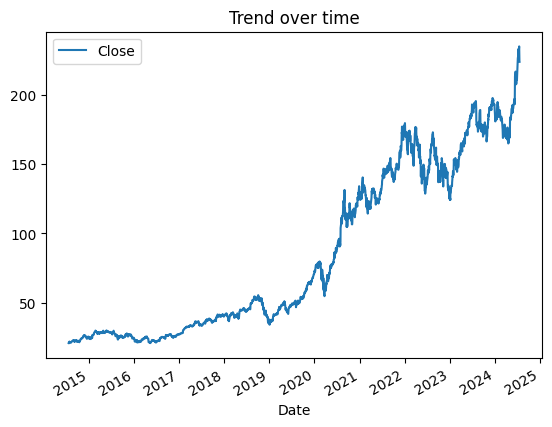

In [9]:
df.plot.line(y="Close", title= "Trend over time", use_index=True);

## Setting up Prediction.

In [10]:
#creating a next day column and the closing price
df["Next Day"]= df["Close"].shift(-1)

In [11]:
df["Target"] = (df["Next Day"] >df["Close"]).astype(int)

In [12]:
df

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
2014-07-21 06:00:00+02:00,21.005501,21.007713,20.724662,20.773312,156316000,20.945797,1
2014-07-22 06:00:00+02:00,20.936951,20.983389,20.813117,20.945797,220788000,21.491995,1
2014-07-23 06:00:00+02:00,21.100587,21.644576,21.045304,21.491995,371672000,21.456610,0
2014-07-24 06:00:00+02:00,21.458822,21.520739,21.321718,21.456610,182916000,21.598143,1
2014-07-25 06:00:00+02:00,21.416813,21.635735,21.370375,21.598143,173876000,21.896669,1
...,...,...,...,...,...,...,...
2024-07-15 06:00:00+02:00,236.479996,237.229996,233.089996,234.399994,62631300,234.820007,1
2024-07-16 06:00:00+02:00,235.000000,236.270004,232.330002,234.820007,43234300,228.880005,0
2024-07-17 06:00:00+02:00,229.449997,231.460007,226.639999,228.880005,57345900,224.179993,0


Target is if the price will go up or down on the next day.

 1 means price will go up,  0 means price will go down.


## Building and training a model

In [13]:
#instatiate model
model= RandomForestClassifier(n_estimators= 100, min_samples_split=90, random_state=1)

#predictors/ feature matrix
X= ["Close", "Volume", "High", "Low"]
#target vector
y= "Target"

#train and test sets
train= df.iloc[:-100]
test= df.iloc[-100:]

#train the model
model.fit(train[X], train[y])

RandomForestClassifier(min_samples_split=90, random_state=1)

## Evaluating the model

In [14]:
preds= model.predict(test[X]) #  numpy array output of predictions.

In [15]:
preds= pd.Series(preds, index=test.index) #convert numpy array to series

In [16]:
precision_score(test["Target"], preds)

0.5151515151515151

The precision score shows how accurately the model predicted that the price would go up on days that price did go up.

## Results

In [17]:
pred_res= pd.concat([test[y], preds], axis=1)

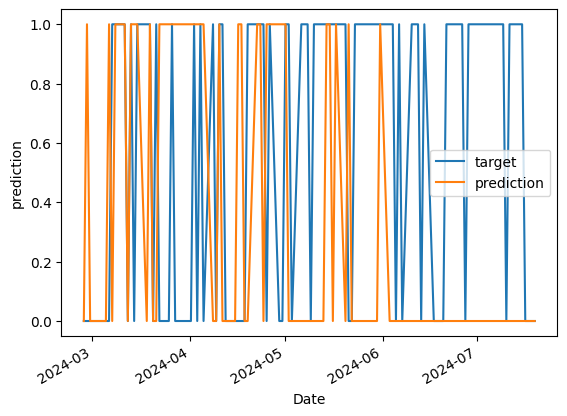

In [18]:
pred_res.plot(ylabel="prediction")
plt.legend(["target", "prediction"]);

In [19]:
Res= pd.DataFrame(df[["Close", "Target"]])

In [20]:
Res["Prediction"]= preds.astype(int)

In [22]:
Res.iloc[:,[0,2,1]].tail(10)

,Close,Prediction,Target
Date,,,
2024-07-08 06:00:00+02:00,227.820007,0.0,1
2024-07-09 06:00:00+02:00,228.679993,0.0,1
2024-07-10 06:00:00+02:00,232.979996,0.0,0
2024-07-11 06:00:00+02:00,227.570007,0.0,1
2024-07-12 06:00:00+02:00,230.539993,0.0,1
2024-07-15 06:00:00+02:00,234.399994,0.0,1
2024-07-16 06:00:00+02:00,234.820007,0.0,0
2024-07-17 06:00:00+02:00,228.880005,0.0,0
2024-07-18 06:00:00+02:00,224.179993,0.0,0


The Prediction is of the next trading day.

1 means the price is predicted to go up.
0 means the price is predicted to go down.